In [18]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Your data analysis and model training code goes here...


In [19]:
df = pd.read_csv('C:\\Users\\harip\\Downloads\\sample project\\Crop-Yield-Prediction-Using-Machin-Learning-Python-main\\yield_df.csv')


In [20]:
df.head()

,Unnamed: 0,Area,Item,Year,hg/ha_yield,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp
0,0,Andhra Pradesh,Arecanut,2000,724,935.6,68.12,16.37
1,1,Andhra Pradesh,Arhar/Tur,2000,216457,935.6,131915.16,16.37
2,2,Andhra Pradesh,Arhar/Tur,2000,2701,935.6,1585.48,16.37
3,3,Andhra Pradesh,Bajra,2000,135964,935.6,33663.50,16.37
4,4,Andhra Pradesh,Bajra,2000,12524,935.6,3699.54,16.37


In [21]:
df.drop('Unnamed: 0',axis=1,inplace=True)

In [22]:
df.shape

(19689, 7)

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19689 entries, 0 to 19688
Data columns (total 7 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Area                           19689 non-null  object 
 1   Item                           19689 non-null  object 
 2   Year                           19689 non-null  int64  
 3   hg/ha_yield                    19689 non-null  int64  
 4   average_rain_fall_mm_per_year  19689 non-null  float64
 5   pesticides_tonnes              19689 non-null  float64
 6   avg_temp                       19689 non-null  float64
dtypes: float64(3), int64(2), object(2)
memory usage: 1.1+ MB


In [24]:
df.isnull().sum()

Area                             0
Item                             0
Year                             0
hg/ha_yield                      0
average_rain_fall_mm_per_year    0
pesticides_tonnes                0
avg_temp                         0
dtype: int64

In [25]:
df.duplicated().sum()

3

In [26]:
df.drop_duplicates(inplace=True)

In [27]:
df.duplicated().sum()

0

In [28]:
def isStr(obj):
    try:
        float(obj)
        return False
    except:
        return True
to_drop = df[df['average_rain_fall_mm_per_year'].apply(isStr)].index

In [29]:
df = df.drop(to_drop)

In [30]:
df

,Area,Item,Year,hg/ha_yield,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp
0,Andhra Pradesh,Arecanut,2000,724,935.6,68.12,16.37
1,Andhra Pradesh,Arhar/Tur,2000,216457,935.6,131915.16,16.37
2,Andhra Pradesh,Arhar/Tur,2000,2701,935.6,1585.48,16.37
3,Andhra Pradesh,Bajra,2000,135964,935.6,33663.50,16.37
4,Andhra Pradesh,Bajra,2000,12524,935.6,3699.54,16.37
...,...,...,...,...,...,...,...
19684,West Bengal,Sunflower,2019,9576,1733.4,2901.54,19.32
19685,West Bengal,Tobacco,2019,20457,1733.4,5605.87,16.37
19686,West Bengal,Urad,2019,44876,1733.4,24733.02,21.23
19687,West Bengal,Urad,2019,5215,1733.4,2035.74,15.98


In [31]:
df['average_rain_fall_mm_per_year'] = df['average_rain_fall_mm_per_year'].astype(np.float64)

In [32]:
len(df['Area'].unique())

30

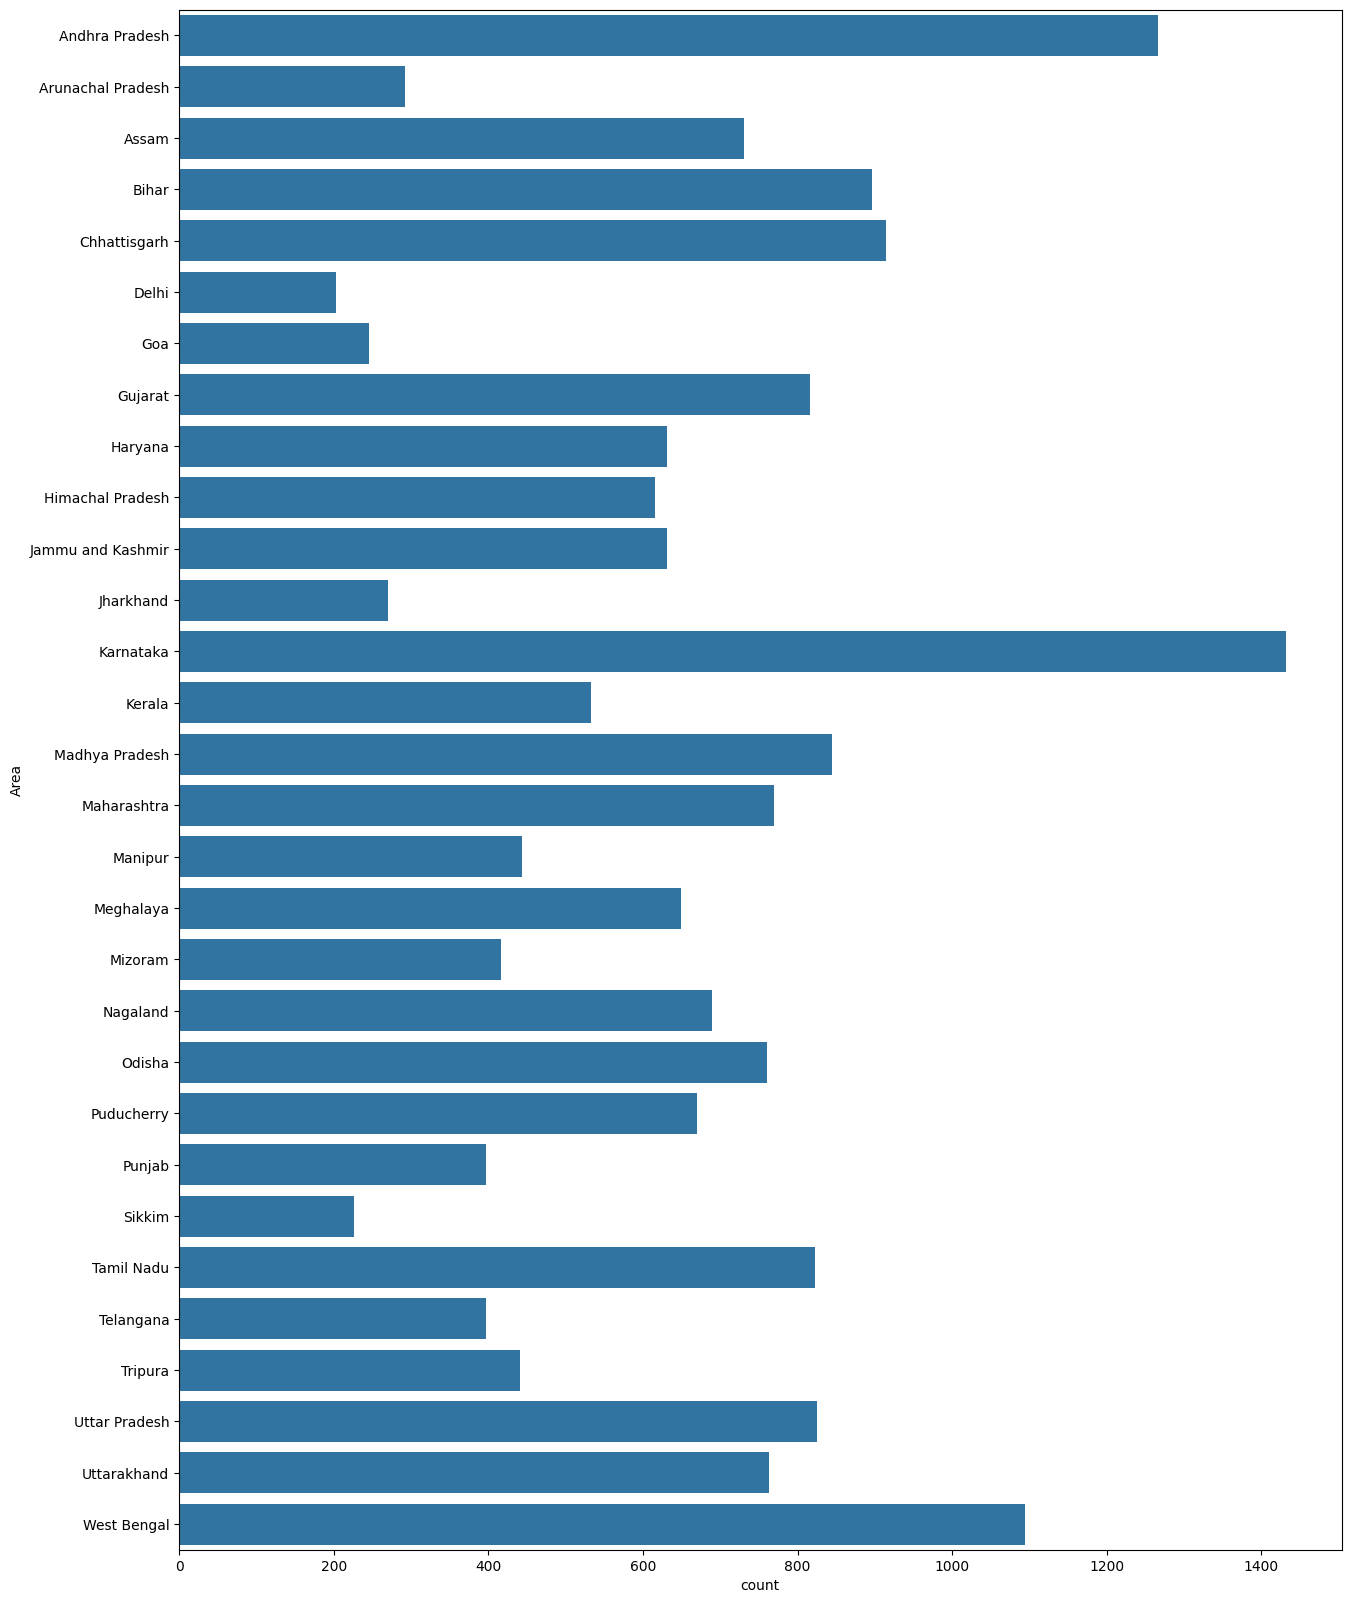

In [33]:
plt.figure(figsize=(15,20))
sns.countplot(y=df['Area'])
plt.show()

In [34]:
(df['Area'].value_counts() < 500).sum()

10

In [35]:
country = df['Area'].unique()
yield_per_country = []
for state in country:
    yield_per_country.append(df[df['Area']==state]['hg/ha_yield'].sum())

In [36]:
df['hg/ha_yield'].sum()

323607146122

In [37]:
yield_per_country

[26076218605,
 9522010,
 3637714928,
 544953534,
 143096606,
 2666022,
 2193998349,
 807480178,
 589739640,
 32297151,
 30298377,
 43793850,
 63772797366,
 129700649755,
 834490323,
 1878564915,
 18764635,
 16516629,
 2769208,
 18748702,
 194080325,
 493815573,
 781551409,
 2744927,
 78051759253,
 147700034,
 16952054,
 4442585302,
 179697342,
 8941179120]

<Axes: >

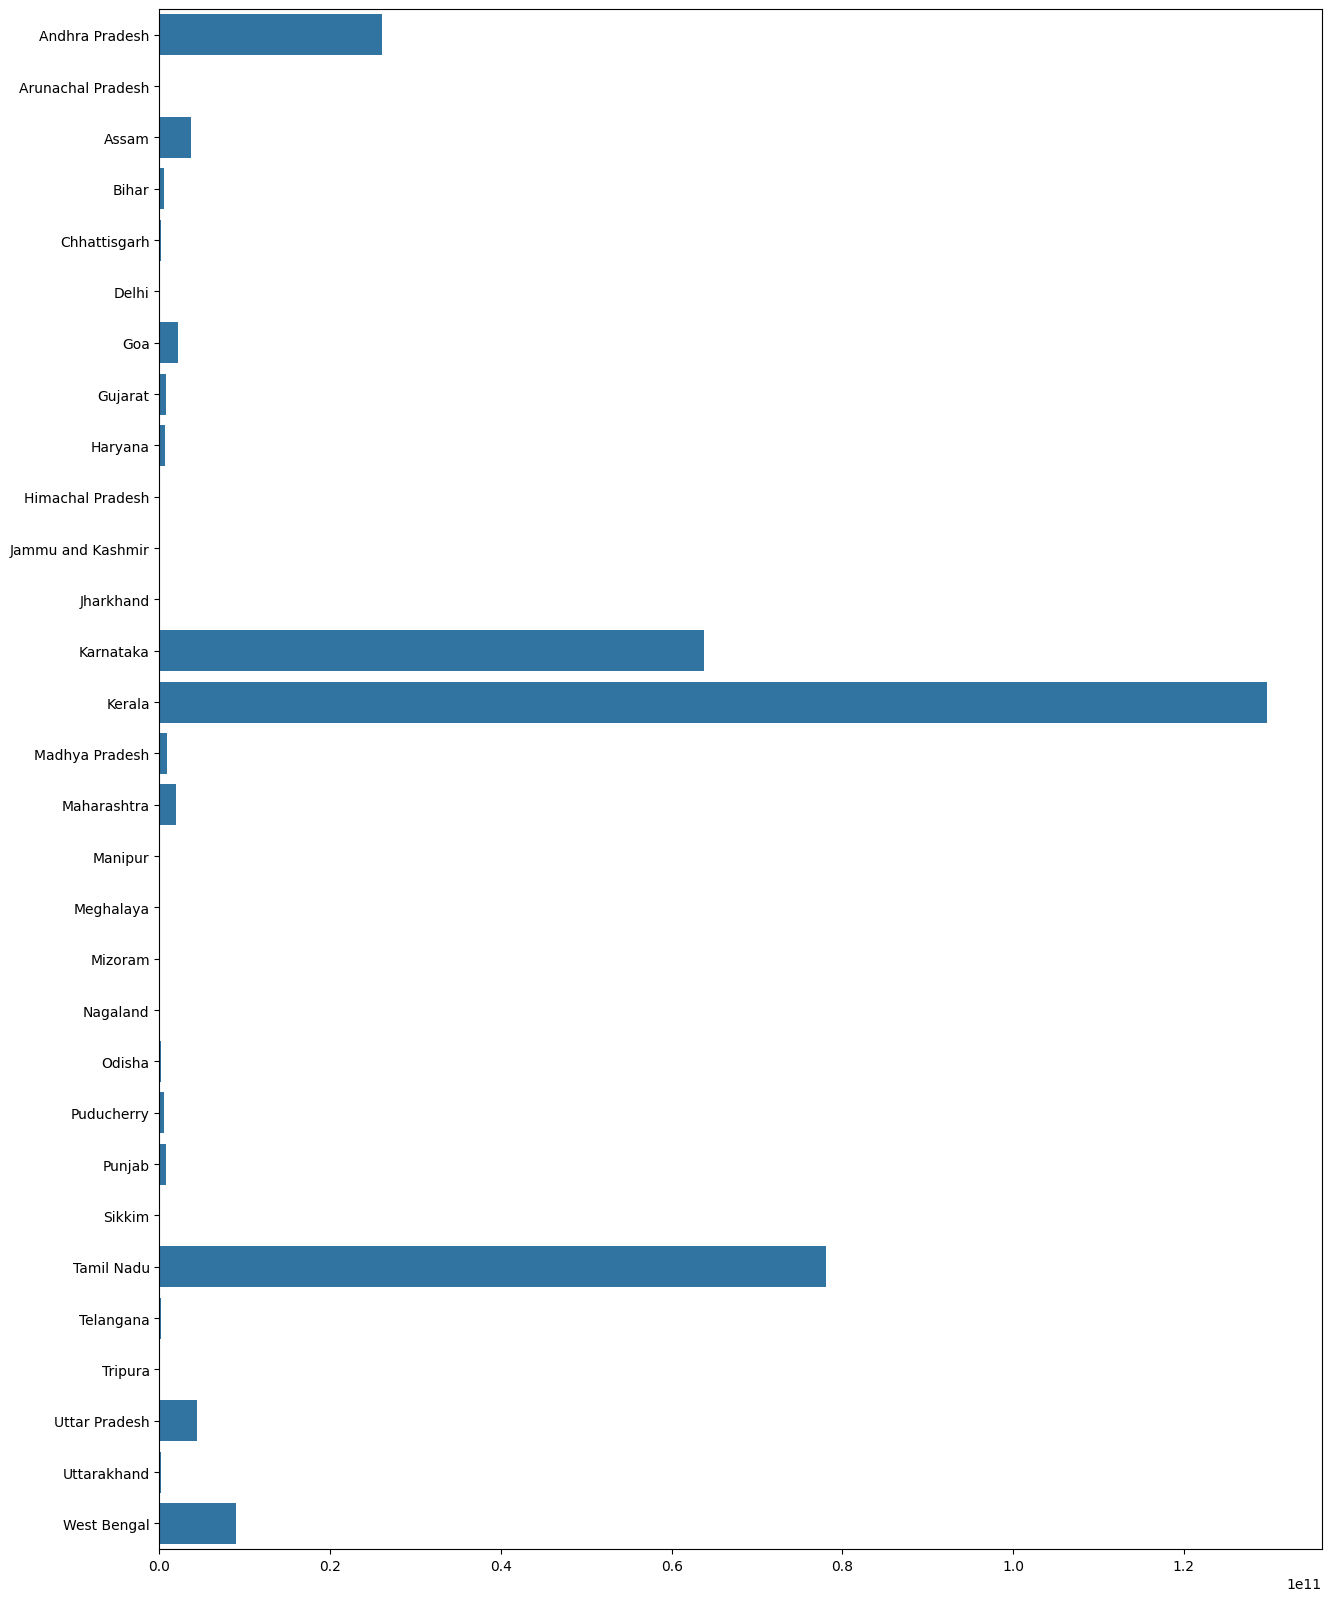

In [38]:
plt.figure(figsize=(15, 20))
sns.barplot(y=country, x=yield_per_country)

<Axes: xlabel='count', ylabel='Item'>

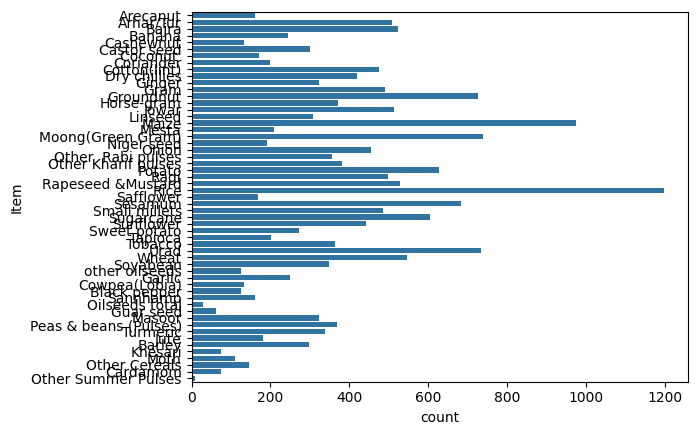

In [39]:
sns.countplot(y=df['Item'])

In [40]:
crops = df['Item'].unique()
yield_per_crop = []
for crop in crops:
    yield_per_crop.append(df[df['Item']==crop]['hg/ha_yield'].sum())

<Axes: >

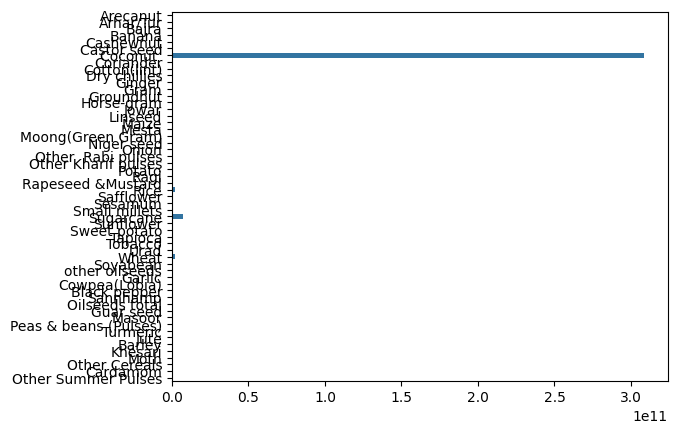

In [41]:
sns.barplot(y=crops,x=yield_per_crop)

In [42]:
col = ['Year', 'average_rain_fall_mm_per_year','pesticides_tonnes', 'avg_temp', 'Area', 'Item', 'hg/ha_yield']
df = df[col]
X = df.iloc[:, :-1]
y = df.iloc[:, -1]

In [43]:
df.head(3)

,Year,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp,Area,Item,hg/ha_yield
0,2000,935.6,68.12,16.37,Andhra Pradesh,Arecanut,724
1,2000,935.6,131915.16,16.37,Andhra Pradesh,Arhar/Tur,216457
2,2000,935.6,1585.48,16.37,Andhra Pradesh,Arhar/Tur,2701


In [44]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=0, shuffle=True)

In [45]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
ohe = OneHotEncoder(drop='first')
scale = StandardScaler()

preprocesser = ColumnTransformer(
        transformers = [
            ('StandardScale', scale, [0, 1, 2, 3]),
            ('OHE', ohe, [4, 5]),
        ],
        remainder='passthrough'
)

In [46]:
X_train_dummy = preprocesser.fit_transform(X_train)
X_test_dummy = preprocesser.transform(X_test)

In [47]:
preprocesser.get_feature_names_out(col[:-1])

array(['StandardScale__Year',
       'StandardScale__average_rain_fall_mm_per_year',
       'StandardScale__pesticides_tonnes', 'StandardScale__avg_temp',
       'OHE__Area_Arunachal Pradesh', 'OHE__Area_Assam',
       'OHE__Area_Bihar', 'OHE__Area_Chhattisgarh', 'OHE__Area_Delhi',
       'OHE__Area_Goa', 'OHE__Area_Gujarat', 'OHE__Area_Haryana',
       'OHE__Area_Himachal Pradesh', 'OHE__Area_Jammu and Kashmir',
       'OHE__Area_Jharkhand', 'OHE__Area_Karnataka', 'OHE__Area_Kerala',
       'OHE__Area_Madhya Pradesh', 'OHE__Area_Maharashtra',
       'OHE__Area_Manipur', 'OHE__Area_Meghalaya', 'OHE__Area_Mizoram',
       'OHE__Area_Nagaland', 'OHE__Area_Odisha', 'OHE__Area_Puducherry',
       'OHE__Area_Punjab', 'OHE__Area_Sikkim', 'OHE__Area_Tamil Nadu',
       'OHE__Area_Telangana', 'OHE__Area_Tripura',
       'OHE__Area_Uttar Pradesh', 'OHE__Area_Uttarakhand',
       'OHE__Area_West Bengal', 'OHE__Item_Arhar/Tur', 'OHE__Item_Bajra',
       'OHE__Item_Banana', 'OHE__Item_Barley', 'OH

In [48]:
from sklearn.linear_model import LinearRegression,Lasso,Ridge
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error,r2_score


models = {
    'lr':LinearRegression(),
    'lss':Lasso(),
    'Rid':Ridge(),
    'Dtr':DecisionTreeRegressor()
}
for name, md in models.items():
    md.fit(X_train_dummy,y_train)
    y_pred = md.predict(X_test_dummy)
    
    print(f"{name} : mae : {mean_absolute_error(y_test,y_pred)} score : {r2_score(y_test,y_pred)}")

lr : mae : 35331114.74703045 score : 0.4084717386738822
lss : mae : 35330854.042701654 score : 0.408472003163855
Rid : mae : 35221229.59721606 score : 0.4088877668469163
Dtr : mae : 2465900.3882681564 score : 0.9332003303617628


In [49]:
dtr = DecisionTreeRegressor()
dtr.fit(X_train_dummy,y_train)
dtr.predict(X_test_dummy)

array([3.000000e+00, 1.732000e+05, 2.937500e+04, ..., 1.089887e+06,
       2.990000e+05, 1.470000e+02])

In [51]:
def prediction(Year, average_rain_fall_mm_per_year, pesticides_tonnes, avg_temp, Area, Item):
    # Create an array of the input features
    features = np.array([[Year, average_rain_fall_mm_per_year, pesticides_tonnes, avg_temp, Area, Item]], dtype=object)

    # Transform the features using the preprocessor
    transformed_features = preprocesser.transform(features)

    # Make the prediction
    predicted_yield = dtr.predict(transformed_features).reshape(1, -1)

    return predicted_yield[0]



In [52]:
result

array([173.])

In [53]:
import pickle
pickle.dump(dtr,open('dtr.pkl','wb'))
pickle.dump(preprocesser,open('preprocessor.pkl','wb'))

In [54]:
import sklearn
print(sklearn.__version__)

1.4.1.post1
